In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('Transaction_Data.csv')

In [2]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.isnull().sum()
# Checks the sum of the null values in the dataset

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
type = data["type"].value_counts()
type
# counts the total number of transaction through each means

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [5]:
transaction = type.index
number = type.values

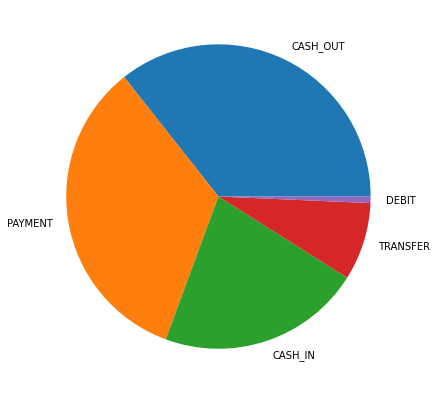

In [6]:
from matplotlib import pyplot as plt
# Creating a plot
fig = plt.figure(figsize=(10,7))
plt.pie(number, labels= transaction)
#show plot
plt.show()

In [7]:
#Finding co-relation
correlation=data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.128862
step              0.045030
oldbalanceOrg     0.003829
newbalanceDest   -0.000495
oldbalanceDest   -0.007552
newbalanceOrig   -0.009438
isFlaggedFraud         NaN
Name: isFraud, dtype: float64


In [8]:
# Converting categorical variables of type into numerical values and "isFraud" values into string ones.
data["type"] = data["type"].map({"CASH_OUT":1,
                               "PAYMENT":2,
                               "CASH_IN":3,
                               "TRANSFER":4,
                               "DEBIT":5})
data["isFraud"] = data["isFraud"].map({0:"OK",
                                     1:"Fraud"})

In [9]:
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,OK,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,OK,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,OK,0


In [12]:
#Importing train-test-split
from sklearn.model_selection import train_test_split
x=np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y=np.array(data[["isFraud"]])

In [13]:
#training a machine learning model
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, )

In [15]:
model=DecisionTreeClassifier()
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [16]:
model.predict(x_test)

array(['OK', 'OK', 'OK', ..., 'OK', 'OK', 'OK'], dtype=object)